## 1- EDA (Exploratory data analysis)

### Conhecendo os dados 

In [39]:
#aqui é as importação das bibliotecas que ira ser usual para execução do codigo 
import pandas as pd 
import numpy as np
import seaborn as sns
import missingno as msno  
import matplotlib.pyplot as plt
import plotly.express as px
import nbformat
from collections import  Counter
from sklearn.preprocessing import MinMaxScaler
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas





[nltk_data] Downloading package punkt to /home/lucas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/lucas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Criei o dataset com  os dados que estar em formato .csv
df = pd.read_csv("desafio_indicium_imdb.csv")
df.head()


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [3]:
#aqui eu apliquei o Drop para dropar, a coluna colocando o nome da coluna(Unnamed:0) e o Eixo(axis=1)
df = df.drop('Unnamed: 0', axis=1)


In [4]:
#aqui serve para mostrar o tipo das variaveis e a quantidade de  de registros não nulos.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.2+ KB


In [5]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,842.000000,9.990000e+02
mean,7.947948,77.969121,2.716214e+05
std,0.272290,12.383257,3.209126e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.547150e+04
50%,7.900000,79.000000,1.383560e+05
75%,8.100000,87.000000,3.731675e+05
max,9.200000,100.000000,2.303232e+06


In [6]:
df[df.duplicated()]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


In [8]:
df['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [9]:

df["Gross"] = df["Gross"].str.replace(",","")
df["Gross"] = df["Gross"].replace(np.nan, 0)
df["Gross"] = df["Gross"].astype(int)


df["Gross"] = df["Gross"].replace(0,df['Gross'].mean())

In [10]:
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross              0
dtype: int64

<Axes: >

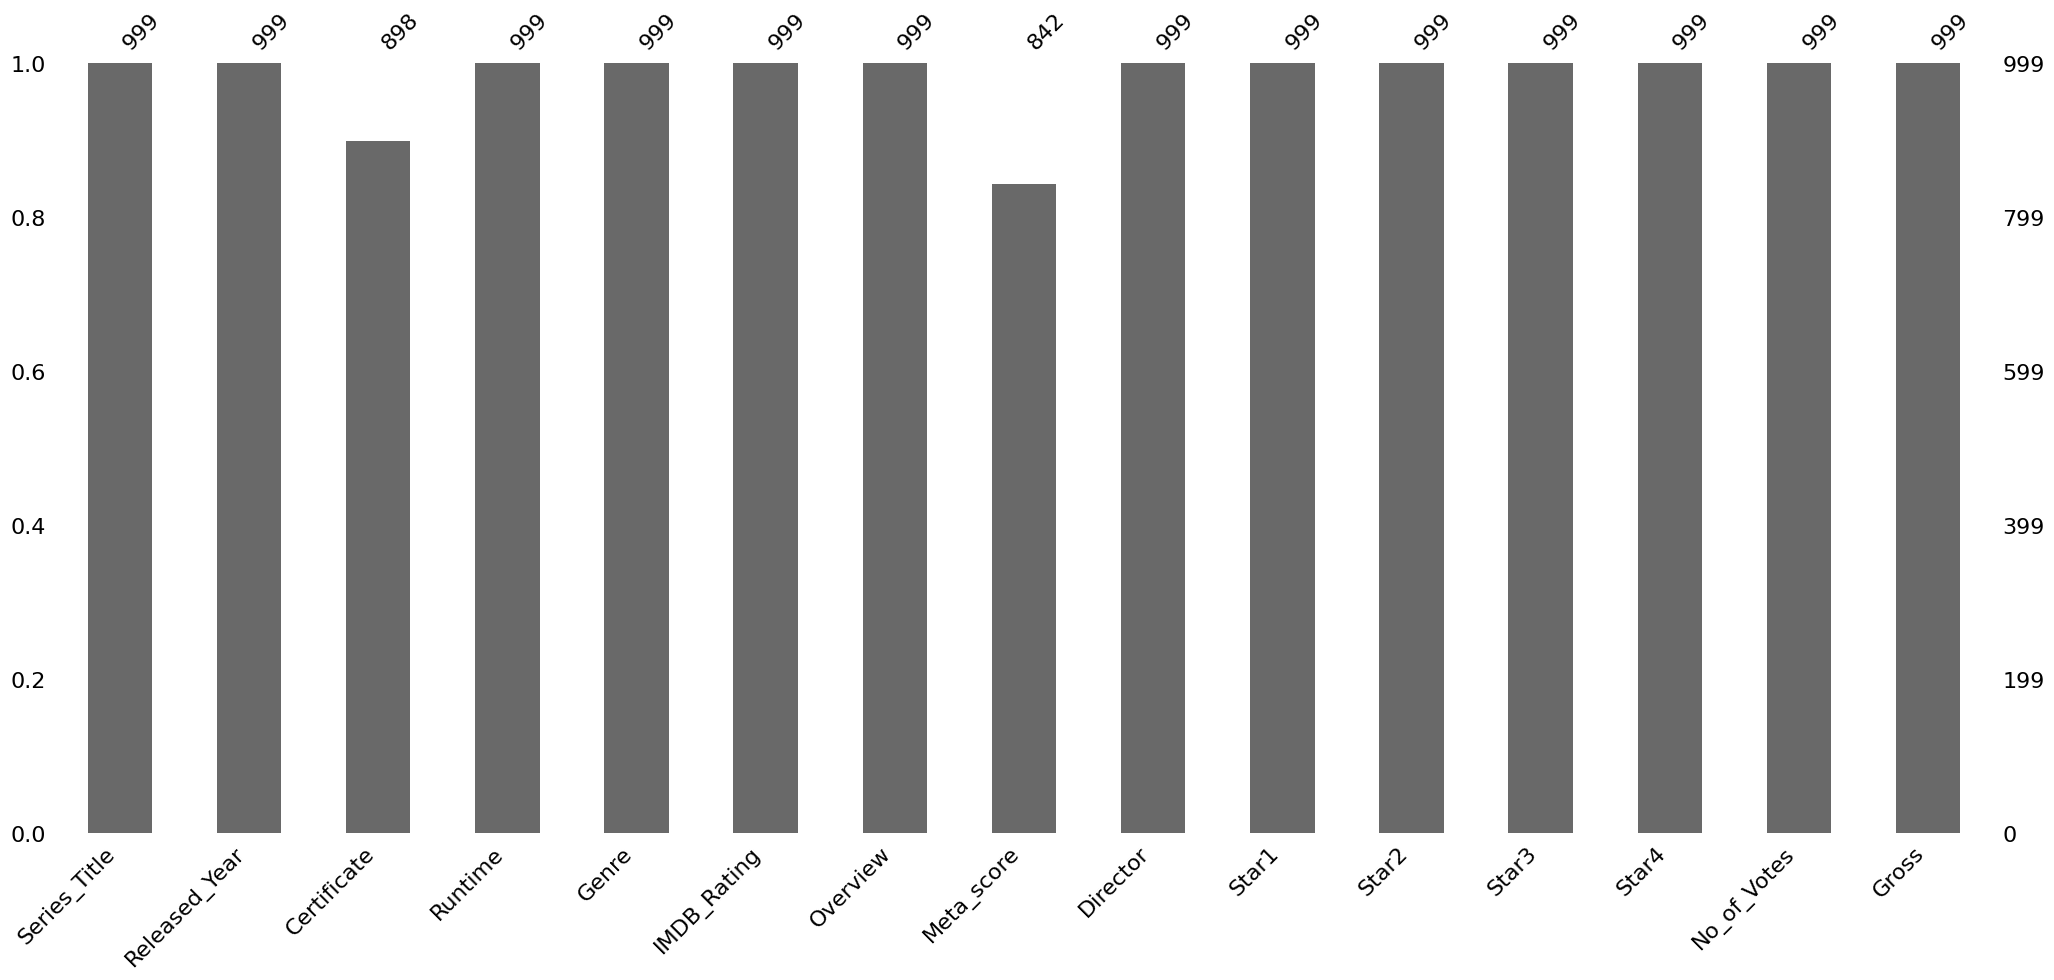

In [11]:
# Nesse grafico mostra que  na coluna Certificate, do total de dados que são 999 registro, tem 898 registros feito, e 101 são Null, confimando graficamente a celula anterior 
msno.bar(df)


In [12]:
df["Runtime"] = df["Runtime"].str.extract('([^\s]+)')
df["Runtime"] = df["Runtime"][~(df["Runtime"] == "min")]
df["Runtime"] = df["Runtime"].astype(int)

In [13]:
df['Released_Year'].value_counts()

Released_Year
2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1920     1
1930     1
1922     1
1943     1
PG       1
Name: count, Length: 100, dtype: int64

In [14]:
non_numeric_years = df[~df['Released_Year'].str.isnumeric()]
print("Valores não numéricos encontrados na coluna 'Released_Year':")
print(non_numeric_years[['Released_Year']])

# Remover linhas com valores não numéricos na coluna 'Released_Year'
df = df[df['Released_Year'].str.isnumeric()]

# Converter 'Released_Year' para tipo inteiro
df['Released_Year'] = df['Released_Year'].astype(int)


print(df.dtypes)

Valores não numéricos encontrados na coluna 'Released_Year':
    Released_Year
965            PG
Series_Title      object
Released_Year      int64
Certificate       object
Runtime            int64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object


In [15]:
#verifica os nomes da coluna 
df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [16]:
df.shape

(998, 15)

### Analisando alguns graficos

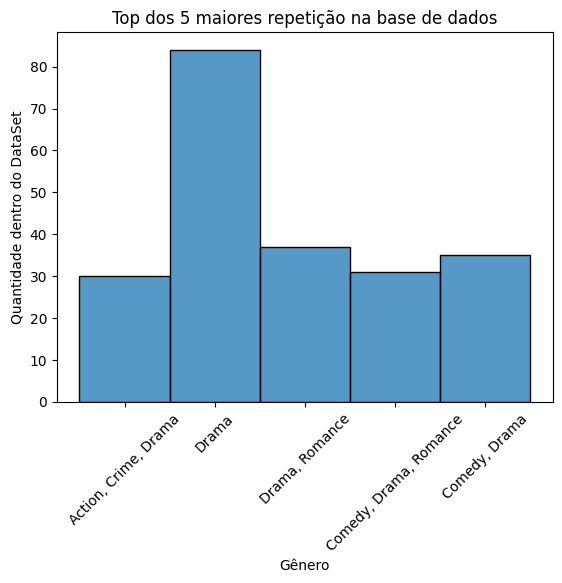

<Figure size 1000x600 with 0 Axes>

9

In [17]:
#Aqui mostra os 5 maiores generos que aprecer com mais frequencia no dataset

top_genres = df['Genre'].value_counts().head(5).index.to_list()

df_top_genres = df[df['Genre'].isin(top_genres)]

ax = sns.histplot(data=df_top_genres, x='Genre')

plt.xticks(rotation=45)

plt.figure(figsize=(10, 6))
ax.set_title('Top dos 5 maiores repetição na base de dados')
ax.set_xlabel('Gênero')
ax.set_ylabel('Quantidade dentro do DataSet')

plt.show()
9

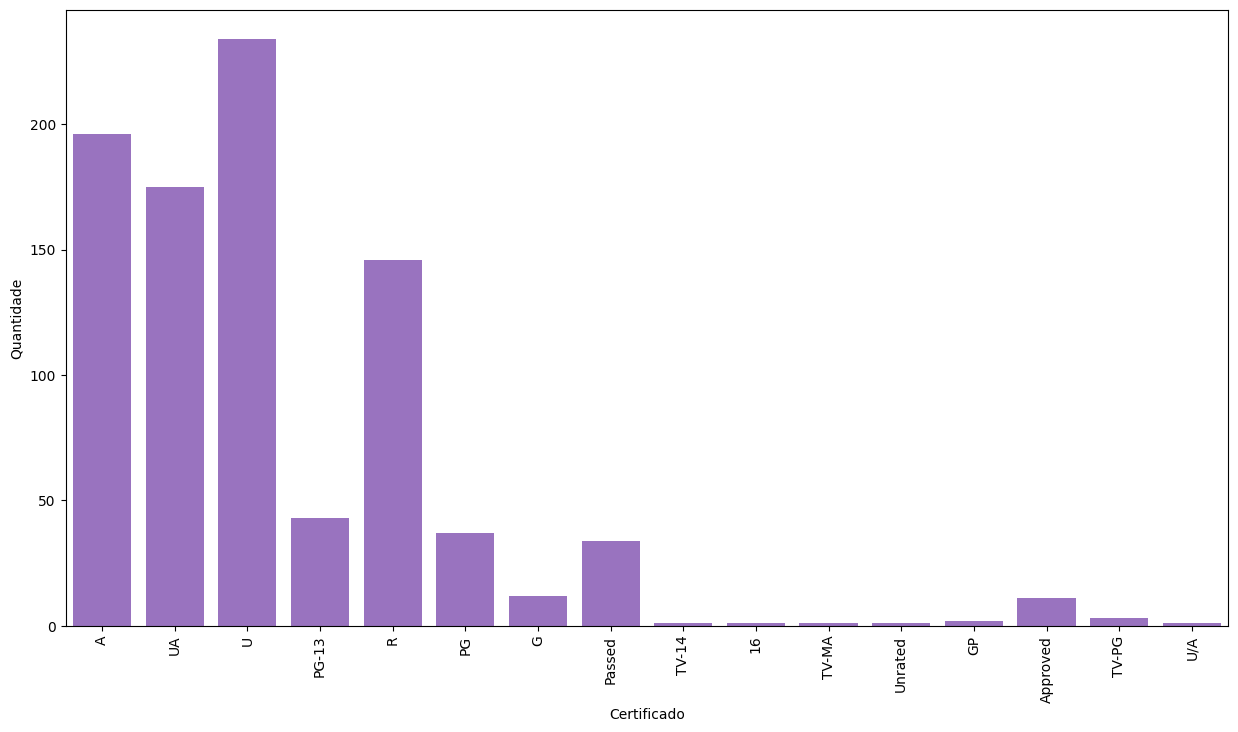

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.countplot(x='Certificate', color='#9966cc', data=df)
plt.xticks(rotation='vertical')
plt.ylabel("Quantidade")
plt.xlabel("Certificado")
plt.show()


In [19]:

df_exploded = df.explode('Genre')

top_rates = df_exploded.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False).head(10).round(2)

top_rates = top_rates.reset_index()


print(top_rates)

                          Genre  IMDB_Rating
0         Animation, Drama, War         8.50
1                Action, Sci-Fi         8.40
2                Drama, Musical         8.40
3           Drama, Mystery, War         8.35
4                       Western         8.35
5        Drama, Fantasy, Horror         8.30
6      Comedy, Musical, Romance         8.30
7           Crime, Drama, Music         8.30
8          Crime, Drama, Sci-Fi         8.30
9  Adventure, Mystery, Thriller         8.30


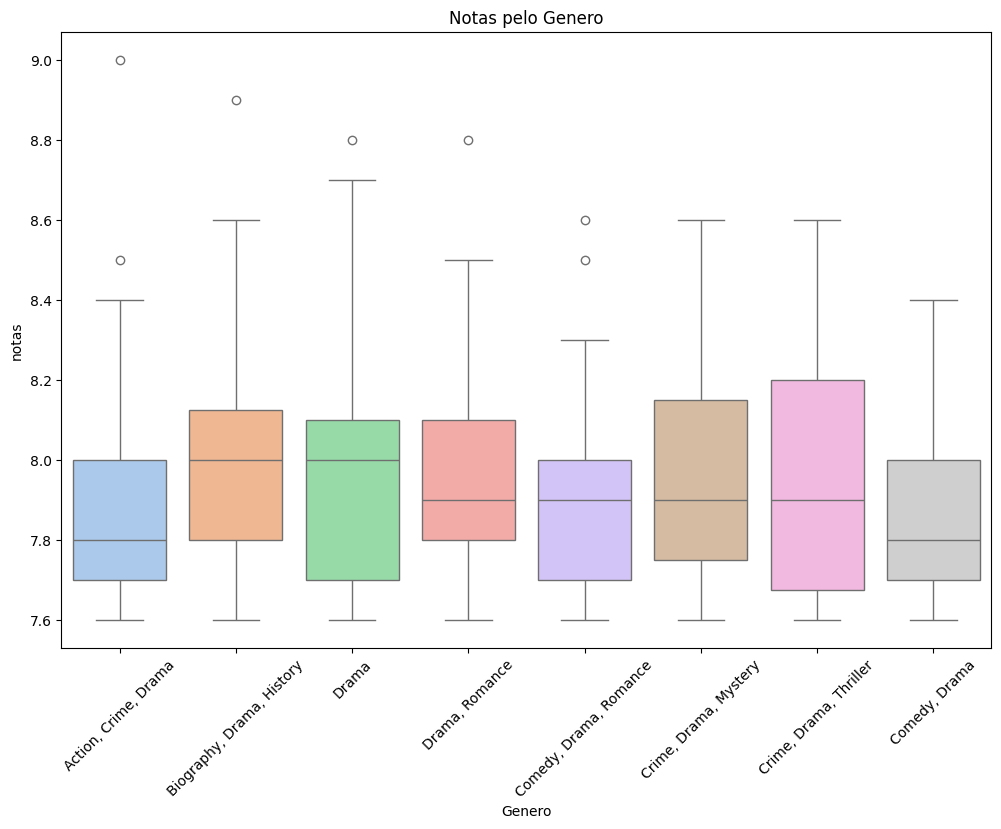

In [20]:
# Identifique os 8 gêneros mais frequentes
# No grafico analisamos que o genero "Action,Crime,Drama", ele mostra que tem uma media 7.8, tem dois outlier (são pontos que se comporta fora do padrão da base de dados),
# onde limite superior é 8.4 , limie inferior 7.6, o maior outlier é 9.0.

top_genres = df['Genre'].value_counts().head(8).index.tolist()


df_filtered = df[df['Genre'].isin(top_genres)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtered, x='Genre', y='IMDB_Rating', palette='pastel', hue='Genre', legend=False)
plt.title('Notas pelo Genero')
plt.xlabel('Genero')
plt.ylabel('notas')
plt.xticks(rotation=45)
plt.show()


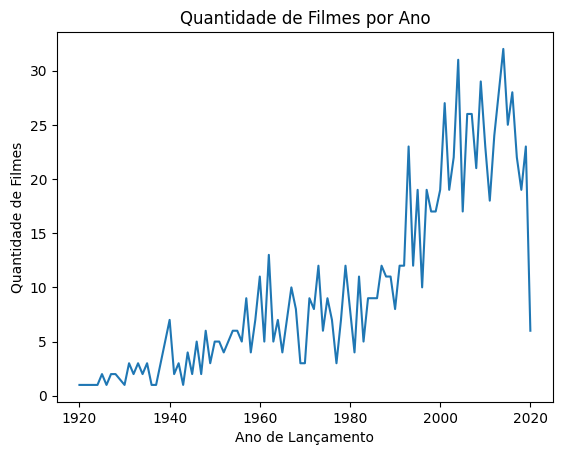

In [21]:
#aqui mostra os a quantidade filme produzido pelo juntando todos os filmes 

df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

df.dropna(subset=['Released_Year'], inplace=True)

df['Released_Year'] = df['Released_Year'].astype('int64')

df_grouped = df.groupby('Released_Year')['Series_Title'].count()

plt.plot(df_grouped.index, df_grouped.values)
plt.xlabel('Ano de Lançamento')
plt.ylabel('Quantidade de Filmes')
plt.title('Quantidade de Filmes por Ano')
plt.show()

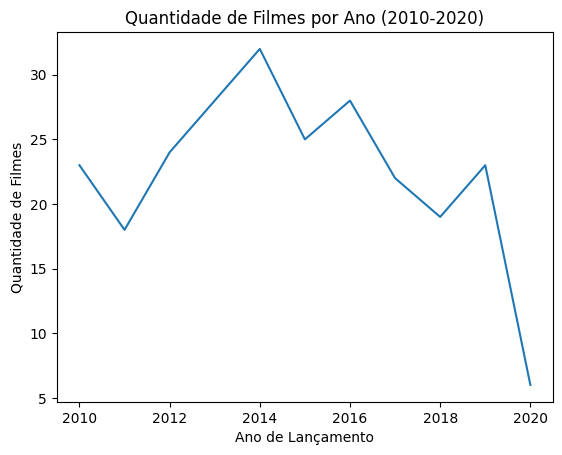

In [22]:
#Aqui é um corte feito de 2010 a 2020, onde veremos que a Pandemia da covid-19 teve grande impactor na produção dos filmes como analisamos o grafico de 2018 a 2020.

df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')


df.dropna(subset=['Released_Year'], inplace=True)


df['Released_Year'] = df['Released_Year'].astype('int64')


df_filtered = df[(df['Released_Year'] >= 2010) & (df['Released_Year'] <= 2020)]

df_grouped = df_filtered.groupby('Released_Year')['Series_Title'].count()

plt.plot(df_grouped.index, df_grouped.values)
plt.xlabel('Ano de Lançamento')
plt.ylabel('Quantidade de Filmes')
plt.title('Quantidade de Filmes por Ano (2010-2020)')
plt.show()

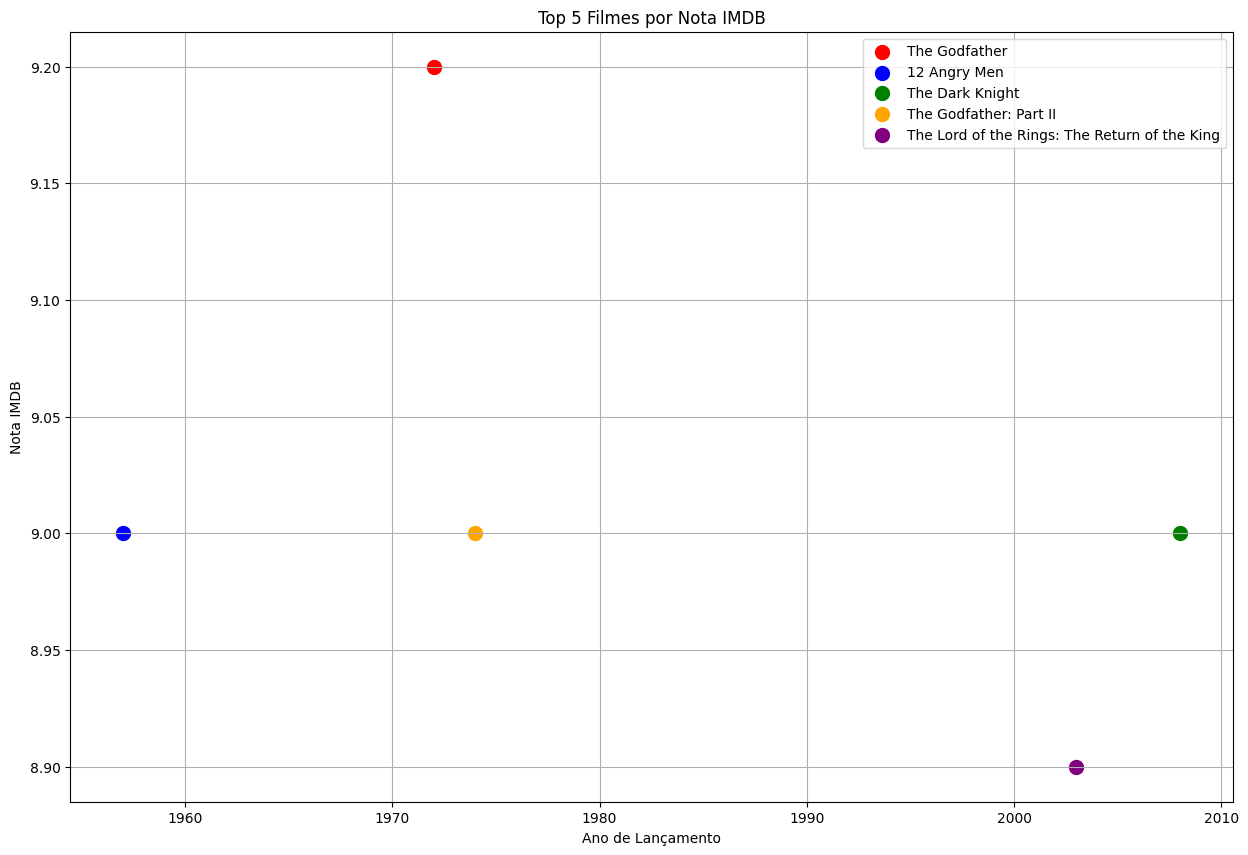

In [23]:
df_top_5 = df.sort_values(by='IMDB_Rating', ascending=False).head(5)

colors = ['red', 'blue', 'green', 'orange', 'purple']  

plt.figure(figsize=(15, 10))  


for i in range(len(df_top_5)):
    plt.scatter(df_top_5.iloc[i]['Released_Year'], df_top_5.iloc[i]['IMDB_Rating'], 
                color=colors[i], label=df_top_5.iloc[i]['Series_Title'], s=100)

plt.xlabel('Ano de Lançamento')
plt.ylabel('Nota IMDB')
plt.title('Top 5 Filmes por Nota IMDB')
plt.grid(True)


plt.legend()

plt.show()

## 2- Responda também às seguintes perguntas:


### A - Qual filme você recomendaria para uma pessoa que você não conhece?

In [24]:
highest_rated_movie = df[df['IMDB_Rating'] == df['IMDB_Rating'].max()]

Nome_do_filme = highest_rated_movie['Series_Title'].values[0]
nota_do_filme = highest_rated_movie['IMDB_Rating'].values[0]

print(f"Eu iria recomendar {Nome_do_filme}, pois pela nota do IMDB ele tem a nota {nota_do_filme}")

Eu iria recomendar The Godfather, pois pela nota do IMDB ele tem a nota 9.2


### B- Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

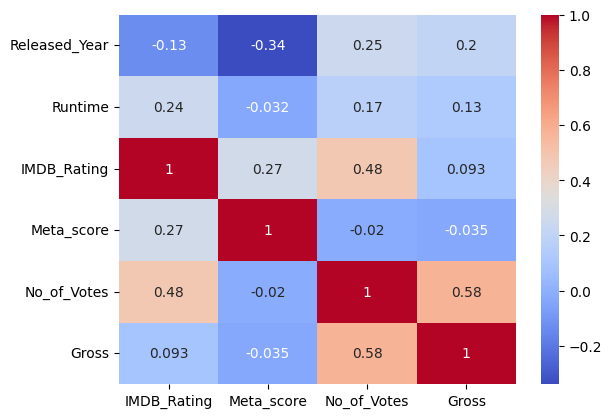

In [26]:
#Comprovamos que a Relação de faturamento tem correlação alta na quantidade de votos, isso significa que quando maior 
#a quantidade de votos é relacionado  a quantidade do valor do faturamento, logo se tem varios votos tera um 
#um faturamento alto

correlation_matrix = df.select_dtypes(include=['number']).corr()
selected_columns = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']

sns.heatmap(correlation_matrix[selected_columns], annot=True, cmap='coolwarm')
plt.show()



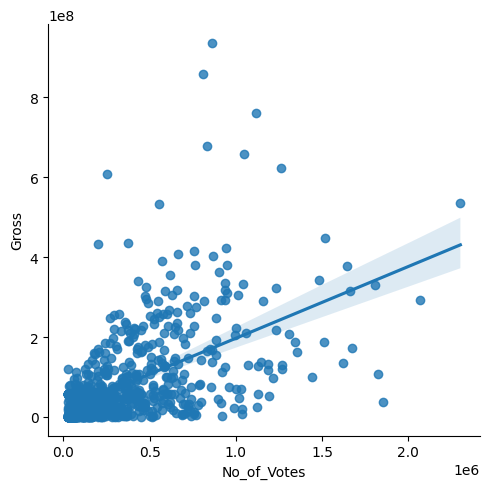

In [27]:
sns.lmplot(x='No_of_Votes', y='Gross', data=df)
plt.show()

<Axes: xlabel='Meta_score', ylabel='Gross'>

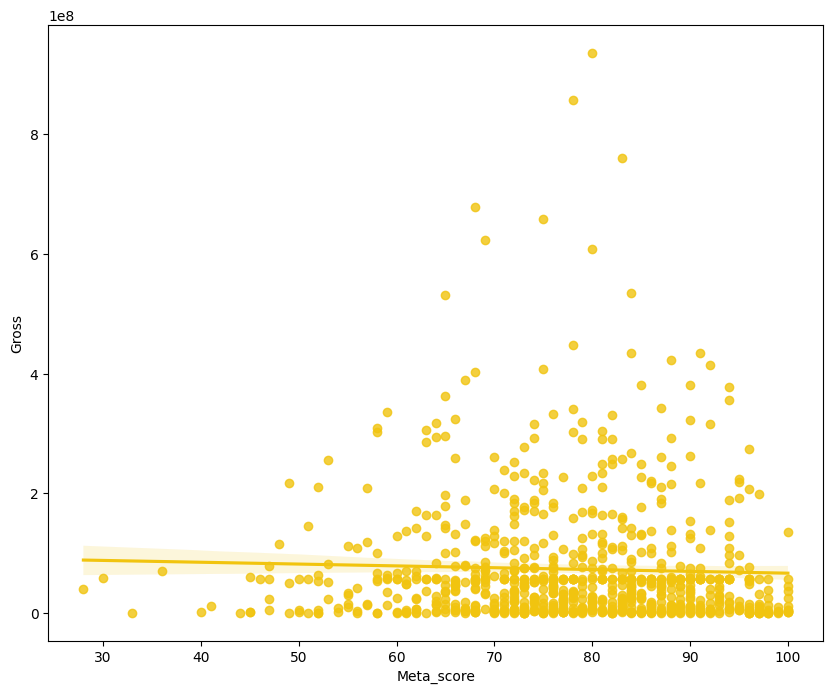

In [28]:
#relação positiva dos valores brutos com meta_score
plt.figure(figsize=(10,8))
sns.regplot(x='Meta_score',y='Gross',data=df,color='#F1C40F')

         Director  IMDB_Rating
0   Anthony Russo     8.075000
1  Gareth Edwards     7.800000
2     J.J. Abrams     7.833333
3     Josh Cooley     7.800000
4    Roger Allers     8.500000
5      Tim Miller     8.000000
6      James Gunn     7.800000
7   James Cameron     8.080000
8    Byron Howard     8.000000
9     David Yates     7.800000


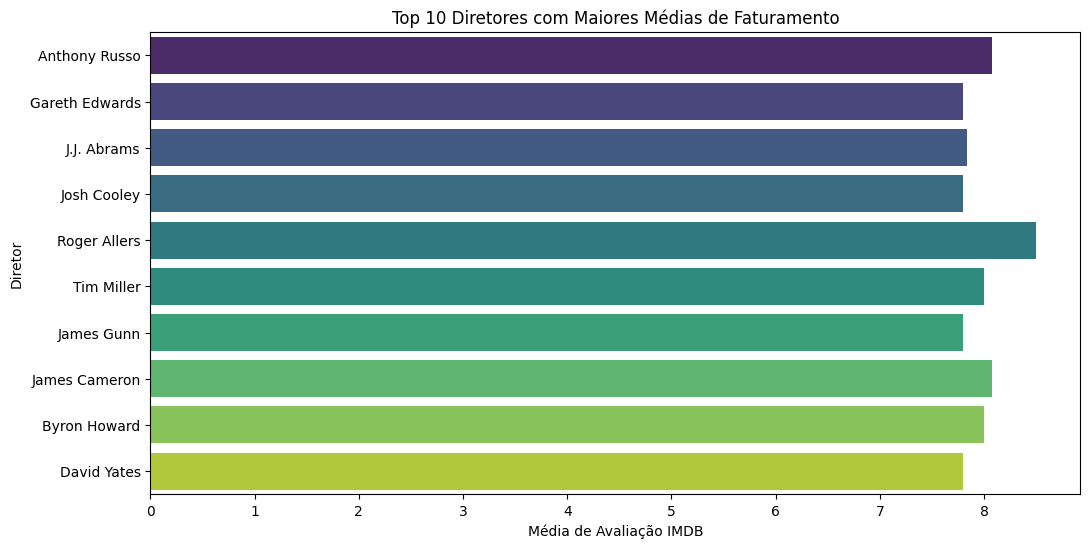

In [29]:

df['Meta_score'] = pd.to_numeric(df['Meta_score'], errors='coerce')
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean())


df['IMDB_Rating'] = pd.to_numeric(df['IMDB_Rating'], errors='coerce')


df['Gross'] = df['Gross'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)


top_directors = df.groupby('Director').mean(numeric_only=True).sort_values('Gross', ascending=False).head(10)
top_directors = top_directors[['IMDB_Rating']]
top_directors.reset_index(inplace=True)


print(top_directors)


plt.figure(figsize=(12, 6))
sns.barplot(x='IMDB_Rating', y='Director', data=top_directors, palette='viridis')
plt.title('Top 10 Diretores com Maiores Médias de Faturamento')
plt.xlabel('Média de Avaliação IMDB')
plt.ylabel('Diretor')
plt.show()

<Axes: xlabel='IMDB_Rating', ylabel='Gross'>

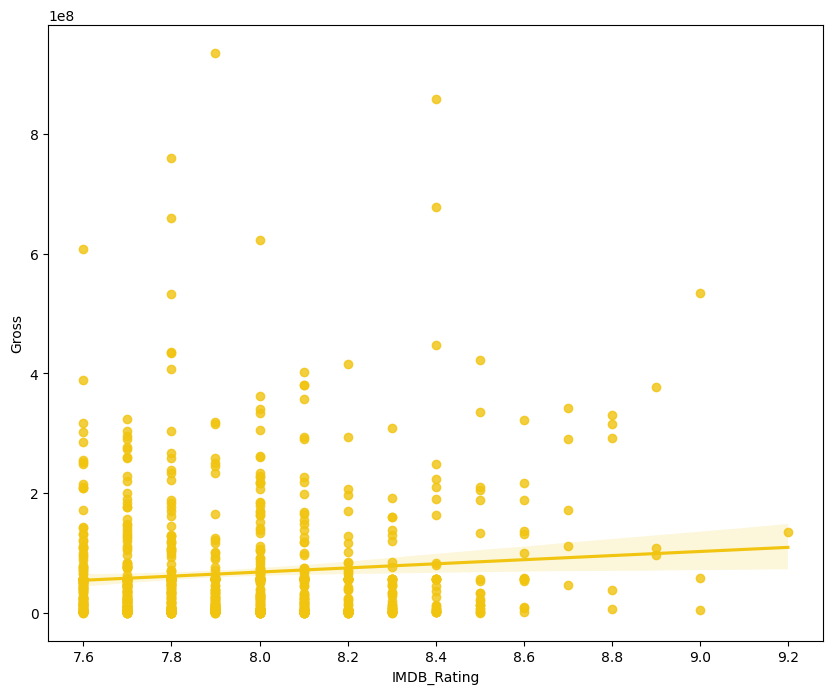

In [30]:
plt.figure(figsize=(10,8))
sns.regplot(x='IMDB_Rating',y='Gross',data=df,color='#F1C40F')

### C - Quais insights podem ser tirados com a coluna Overview? É possível inferiro gênero do filme apartir dessa coluna?

In [31]:
'''A partir da coluna 'Overview', é possível analisar as palavras-chave que podem sinalizar os principais 
temas do filme. Ao utilizar esses dados, realizamos cruzamentos com o gênero do filme. Além disso,
é viável aplicar algoritmos de inferência mais sofisticados utilizando aprendizado de máquina.'''

"A partir da coluna 'Overview', é possível analisar as palavras-chave que podem sinalizar os principais \ntemas do filme. Ao utilizar esses dados, realizamos cruzamentos com o gênero do filme. Além disso,\né viável aplicar algoritmos de inferência mais sofisticados utilizando aprendizado de máquina."

In [32]:
df[['Genre','Overview']]

,Genre,Overview
0,"Crime, Drama",An organized crime dynasty's aging patriarch t...
1,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...
2,"Crime, Drama",The early life and career of Vito Corleone in ...
3,"Crime, Drama",A jury holdout attempts to prevent a miscarria...
4,"Action, Adventure, Drama",Gandalf and Aragorn lead the World of Men agai...
...,...,...
994,"Comedy, Drama, Romance",A young New York socialite becomes interested ...
995,"Drama, Western",Sprawling epic covering the life of a Texas ca...
996,"Drama, Romance, War","In Hawaii in 1941, a private is cruelly punish..."
997,"Drama, War",Several survivors of a torpedoed merchant ship...


[nltk_data] Downloading package stopwords to /home/lucas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


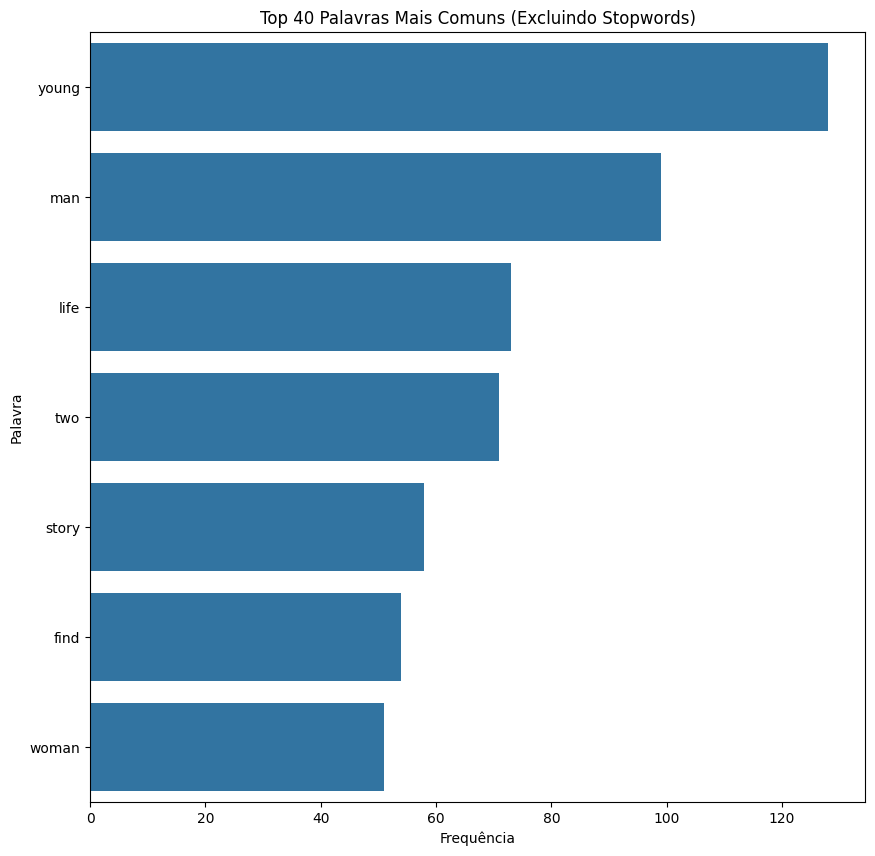

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def plot_top_non_stopwords_barchart(text):
    stop = set(stopwords.words('english'))
    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:40]:
        if word.lower() not in stop:  
            x.append(word)
            y.append(count)
            
    plt.figure(figsize=(10, 10))
    sns.barplot(x=y, y=x)
    plt.title('Top 40 Palavras Mais Comuns (Excluindo Stopwords)')
    plt.xlabel('Frequência')
    plt.ylabel('Palavra')
    plt.show()


plot_top_non_stopwords_barchart(df['Overview'])


In [34]:


def infer_genre(overview):
    overview = overview.lower()
    overview = ''.join(e for e in overview if e.isalnum() or e.isspace())
    
    overview = nltk.word_tokenize(overview)
    
    stop_words = set(nltk.corpus.stopwords.words('english'))
    overview = [word for word in overview if word not in stop_words]
    
    genre_keywords = {
        'action': ['fight', 'battle', 'explosion'],
        'comedy': ['funny', 'humor', 'laugh'],
        'drama': ['love', 'loss', 'family'],
        'horror': ['scary', 'ghost', 'monster'],
        'romance': ['love', 'relationship', 'kiss']
    }
    
    
    genre_scores = {}
    for genre, keywords in genre_keywords.items():
        score = sum(1 for word in overview if word in keywords)
        genre_scores[genre] = score
    

    inferred_genre = max(genre_scores, key=genre_scores.get)
    
    return inferred_genre

movie_overview = "An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son."
inferred_genre = infer_genre(movie_overview)
print(f"O genero é : {inferred_genre}")


O genero é : action


## 3- Explique como você faria a previsão da nota do imdb a partir dos dados. 

### 3.1- Quais variáveis e/ou suas transformações você utilizou e por quê?

In [45]:
X = df[['Meta_score', 'No_of_Votes', 'Gross','Runtime']] 

Escolhi estas três variáveis porque são numéricas e não requerem alterações nos valores. O faturamento (Gross) influencia diretamente na quantidade de pessoas que assistiram ao filme; se o faturamento é alto, é provável que muitas pessoas tenham ido vê-lo. O número de votos reflete o engajamento do público, pois indica quantos espectadores votaram no filme. A média da crítica (IMDB_Rating) é fundamental, pois serve de base para calcular a nota final do filme, refletindo a percepção geral da qualidade.O tempo de filme tambem influência, visto que maioria dos filmes que tem muito tempo de tela atrai pouco publico.

### 3.2- Qual tipo de problema estamos resolvendo (regressão, classificação)?

É um problema de Regressão visto que fazer previsão de numeros, mas precisamente regressão Linear, visto que a Regressão Logistica é entre 0 ou 1 (V-F), porem para prever varios numeros 1, 2, 3, 4 ,4.5, 4.6, usamos a Rregressão linear. Não usamos a classificação ṕois é um algorismo de agrupamento, para grupos, geralmente usamos o algorimos de k-means para fazer a parte de agrupamento, seria um exemplo de agrupamento, separa Cachorro ou gato, onde ai tem um grupo dos cachorros e o grupo dos gatos.

### 3.3- Qual modelo melhor se aproxima dos dados e quais seus prós e contras? 

Esse tipo de modelo apresenta vantagens significativas, como alta precisão nos dados de treinamento, simplicidade na implementação e facilidade para corrigir o overfitting, caso ocorra. No entanto, suas desvantagens incluem uma tendência potencial ao overfitting, o que pode tornar o modelo tendencioso, especialmente em conjuntos de dados menores, onde pode não ser tão eficiente.

### 3.4- Qual medida de performance do modelo foi escolhida e porquê?

A medida de desempenho escolhida para avaliar o modelo foi o coeficiente de determinação R2, , também conhecido como R-squared. Esta medida é comumente utilizada para avaliar o quão bem o modelo de regressão se ajusta aos dados observados. O R2 varia de 0 a 1, onde 1 indica um ajuste perfeito dos dados pelo modelo e 0 indica que o modelo não consegue explicar a variabilidade dos dados. Essa escolha foi feita porque o R2,fornece uma indicação clara da qualidade do ajuste do modelo aos dados de teste, facilitando a interpretação da performance do modelo de regressão.MSE serve para avaliar o quão bem o modelo está prevendo os valores reais. Um valor de MSE menor indica que as previsões do modelo estão mais próximas dos valores reais, o que reflete um melhor desempenho do modelo de regressão.


## 4- Supondo um filme com as seguintes características:

In [36]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("desafio_indicium_imdb.csv")

features=['Runtime','Meta_score','No_of_Votes','Gross']
target=['IMDB_Rating']

X = df[features]
y = df[target]

data=df.loc[:,features+target]


if data['Gross'].dtype != 'object':
    data['Gross'] = data['Gross'].astype(str)


data['Gross']=data['Gross'].str.replace(',','')
data['Runtime']=data['Runtime'].str.replace(' min','')
data['Gross']=data['Gross'].astype('float')
data['Runtime']=data['Runtime'].astype('float64')

data['Gross']=data['Gross'].replace(np.nan,0)
data['Runtime']=data['Runtime'].replace(np.nan,0)
data['Meta_score']=data['Meta_score'].replace(np.nan,0)

data['Gross']=data['Gross'].astype(int)
data['Runtime']=data['Runtime'].astype(int)
data['Meta_score']=data['Meta_score'].astype(int)


train, tests = train_test_split(data.loc[:,:].to_numpy(),test_size=0.40)
x_train=train[:,:4]
y_train=train[:,4]
cv, test=train_test_split(tests,test_size=0.5)
x_cv=cv[:,:4]
y_cv=cv[:,4]
x_test=test[:,:4]
y_test=test[:,4]

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo nos dados de treino
model.fit(x_train, y_train)

# Fazer previsões usando o conjunto de validação cruzada (CV)
y_pred_cv = model.predict(x_cv)

# Fazer previsões usando o conjunto de teste
y_pred_test = model.predict(x_test)



In [52]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error

# Métricas de avaliação para o conjunto de validação cruzada (CV)
r2_cv = r2_score(y_cv, y_pred_cv)
mse_cv = mean_squared_error(y_cv, y_pred_cv)


print("Métricas para o conjunto de validação cruzada (CV):")
print(f"R²: {round(r2_cv,2)}")
print(f"MSE: {round(mse_cv,2)}")


# Métricas de avaliação para o conjunto de teste
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)


print("\nMétricas para o conjunto de teste:")
print(f"R²: {round(r2_test,2)}")
print(f"MSE: {round(mse_test,2)}")


Métricas para o conjunto de validação cruzada (CV):
R²: 0.36
MSE: 0.05

Métricas para o conjunto de teste:
R²: 0.38
MSE: 0.05


In [37]:
movie_data = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

# Converter o dicionário em DataFrame
movie_df = pd.DataFrame([movie_data])

# Pré-processamento dos dados
movie_df['Runtime'] = movie_df['Runtime'].str.replace(' min', '').astype(float)  # Remover ' min' e converter para float
movie_df['Gross'] = movie_df['Gross'].str.replace(',', '').astype(float)  # Remover vírgulas e converter para float

# Selecionar apenas as features necessárias
features = ['Runtime', 'Meta_score', 'No_of_Votes', 'Gross']
X_new = movie_df[features]

# Usar o modelo treinado para fazer a previsão
predicted_rating = model.predict(X_new)
predicted_rating = predicted_rating.round(2)

print(f"A nota prevista no IMDB para o filme 'The Shawshank Redemption' é: {predicted_rating[0]}")


A nota prevista no IMDB para o filme 'The Shawshank Redemption' é: 9.24
